This notebook will compare results from paper to the ones obtained in the experiment, for every setting and classifier.

Settings:
<ol>
    <li>target edu-num; Logistic regression; equal weights</li>
    <li>target edu-num; Logistic regression; age preferred</li>
    <li>target edu-num; Logistic regression; race preferred</li>
    <li>target edu-num; Linear SVC; equal weights</li>
    <li>target edu-num; Linear SVC; age preferres</li>
    <li>target edu-num; Linear SVC; race preferred</li>
    <li>target edu-num; Random Forest; equal weights</li>
    <li>target edu-num; Random Forest; age preferres</li>
    <li>target edu-num; Random Forest; race preferred</li>
    <li>target edu-num; Gradient Boosting; equal weights</li>
    <li>target edu-num; Gradient Boosting; age preferres</li>
    <li>target edu-num; Gradient Boosting; race preferred</li>
    <li>...</li>
</ol>

In [167]:
import csv
import matplotlib.pyplot as plt
import pickle

In [168]:
k_values = [-1, 3, 7, 11, 15, 19, 23, 27, 31, 35, 39] # first and last k are wrong for visualization reasons

## EDUCATION-NUM

In [169]:
# read the results from paper -> data/paper_results (csv)
def read_paper_results(filepath):
    #filepath = "../data/paper_results/LR_edu-num_equal.csv"
    input_file = csv.DictReader(open(filepath), fieldnames=["k", "value"])
    points = []
    for i, row in enumerate(input_file):
        if round(float(row['k'])) != k_values[i]:
            print("Something went wrong with k values.  \nk in file: " + str(round(float(row['k']))) + "\nk desired: " + str(k_values[i]))
            break
        points.append(float(row['value']))

    return points

In [170]:
LR_equal_paper = read_paper_results("../data/paper_results/LR_edu-num_equal.csv")
LR_age_paper = read_paper_results("../data/paper_results/LR_edu-num_age.csv")
LR_race_paper = read_paper_results("../data/paper_results/LR_edu-num_race.csv")

LSVC_equal_paper = read_paper_results("../data/paper_results/LSVC_edu-num_equal.csv")
LSVC_age_paper = read_paper_results("../data/paper_results/LSVC_edu-num_age.csv")
LSVC_race_paper = read_paper_results("../data/paper_results/LSVC_edu-num_race.csv")

RF_equal_paper = read_paper_results("../data/paper_results/RF_edu-num_equal.csv")
RF_age_paper = read_paper_results("../data/paper_results/RF_edu-num_age.csv")
RF_race_paper = read_paper_results("../data/paper_results/RF_edu-num_race.csv")

GB_equal_paper = read_paper_results("../data/paper_results/GB_edu-num_equal.csv")
GB_age_paper = read_paper_results("../data/paper_results/GB_edu-num_age.csv")
GB_race_paper = read_paper_results("../data/paper_results/GB_edu-num_race.csv")

In [171]:
# read experiment results -> output/classification-res (pickled)
def load_classification_results(weights):
    if weights != "":
        weights += "_"
    f1_scores_GB = []
    f1_scores_LR_ne = []
    f1_scores_LR_b = []
    f1_scores_LSVC = []
    f1_scores_RF = []
    
    for k in k_values:
        # load results
        if k==-1:
            infile = open('../output/education-num/classification-res/adult_multiclass_full', 'rb')
        elif k==39:
            infile = open('../output/education-num/classification-res/adult_multiclass_' + weights + 'k100', 'rb')
        else:
            infile = open('../output/education-num/classification-res/adult_multiclass_' + weights + 'k' + str(k), 'rb')
        scores = pickle.load(infile)
        infile.close()

        f1_scores_GB.append(scores['Gradient Boosting'])
        f1_scores_LR_b.append(scores['Logistic Regression binary'])
        f1_scores_LR_ne.append(scores['Logistic Regression number-encoded'])
        f1_scores_LSVC.append(scores['Linear SVC'])
        f1_scores_RF.append(scores['Random Forest'])
    
    return f1_scores_LR_ne, f1_scores_LR_b, f1_scores_LSVC, f1_scores_RF, f1_scores_GB

In [172]:
LR_ne, LR_b, LSVC, RF, GB = load_classification_results("")
#LR_ne_age, LR_b_age, LSVC_age, RF_age, GB_age = load_classification_results("emph_age")
LR_ne_race, LR_b_race, LSVC_race, RF_race, GB_race = load_classification_results("emph_race")

FileNotFoundError: [Errno 2] No such file or directory: '../output/education-num/classification-res/adult_multiclass_emph_race_k15'

([<matplotlib.axis.XTick at 0x1be900f0>,
 <a list of 11 Text xticklabel objects>)

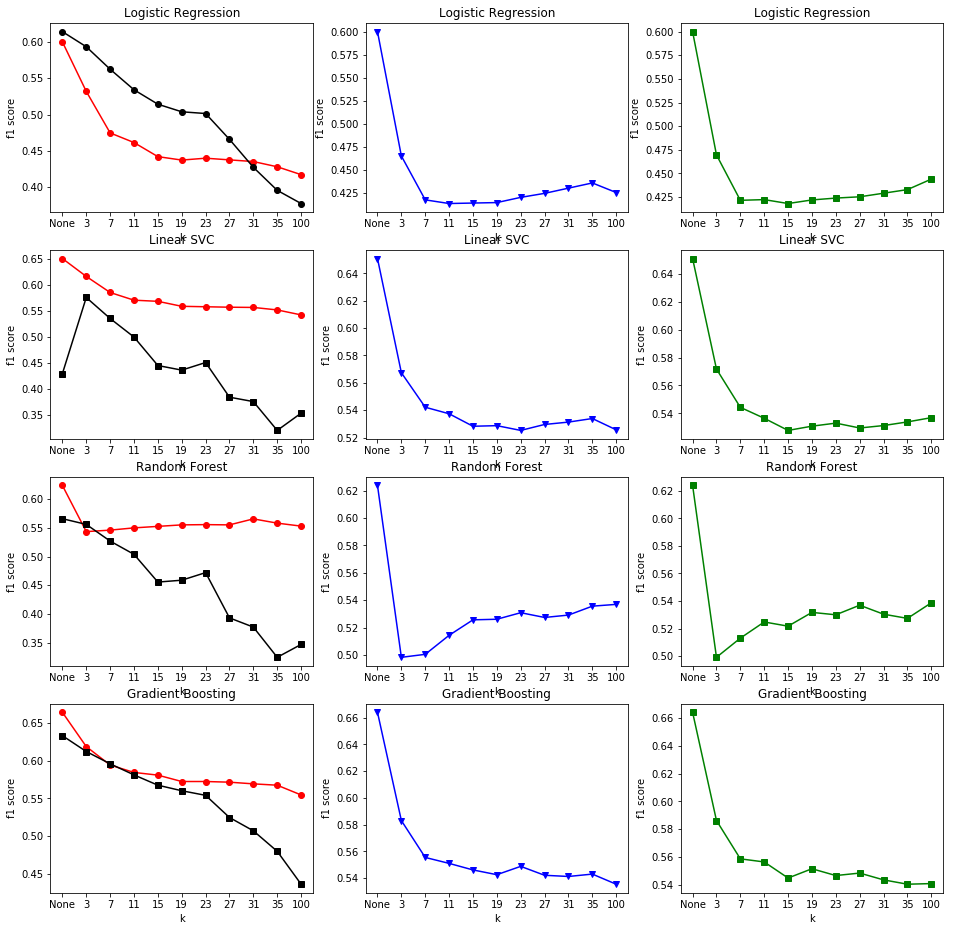

In [192]:
# Visualize
ticks = k_values
xlabels = list(k_values); xlabels[0] = "None"; xlabels[-1] = 100

# ----- LOGISTIC REGRESSION -----
# --- equal weight - red ---
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(4,3,1)
ax.set_title('Logistic Regression')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LR_equal_paper, marker='o', color='r')
#plt.plot(ticks, LR_ne, marker='v', color='b')
plt.plot(ticks, LR_b, marker='o', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- age preferred - blue ---
ax = fig.add_subplot(4,3,2)
ax.set_title('Logistic Regression')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LR_age_paper, marker='v', color='b')
#plt.plot(ticks, LR_ne, marker='v', color='b')
#plt.plot(ticks, LR_b, marker='v', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- race preferred - green ---
ax = fig.add_subplot(4,3,3)
ax.set_title('Logistic Regression')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LR_race_paper, marker='s', color='g')
#plt.plot(ticks, LR_ne, marker='v', color='b')
#plt.plot(ticks, LR_b, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# ----- LINEAR SVC -----
# --- equal weights - red ---
ax = fig.add_subplot(4,3,4)
ax.set_title('Linear SVC')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LSVC_equal_paper, marker='o', color='r')
plt.plot(ticks, LSVC, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- age preferred - blue ---
ax = fig.add_subplot(4,3,5)
ax.set_title('Linear SVC')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LSVC_age_paper, marker='v', color='b')
#plt.plot(ticks, LSVC_age, marker='v', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- race preferred - green ---
ax = fig.add_subplot(4,3,6)
ax.set_title('Linear SVC')
ax.set_xticklabels(xlabels)

plt.plot(ticks, LSVC_race_paper, marker='s', color='g')
#plt.plot(ticks, LSVC_race, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# ----- RANDOM FOREST -----
# --- equal weights - red ---
ax = fig.add_subplot(4,3,7)
ax.set_title('Random Forest')
ax.set_xticklabels(xlabels)

plt.plot(ticks, RF_equal_paper, marker='o', color='r')
plt.plot(ticks, RF, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- age preferred - blue ---
ax = fig.add_subplot(4,3,8)
ax.set_title('Random Forest')
ax.set_xticklabels(xlabels)

plt.plot(ticks, RF_age_paper, marker='v', color='b')
#plt.plot(ticks, RF_age, marker='v', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- race preferred - green ---
ax = fig.add_subplot(4,3,9)
ax.set_title('Random Forest')
ax.set_xticklabels(xlabels)

plt.plot(ticks, RF_race_paper, marker='s', color='g')
#plt.plot(ticks, RF_race, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# ----- GRADIENT BOOSTING -----
# --- equal weights - red ---
ax = fig.add_subplot(4,3,10)
ax.set_title('Gradient Boosting')
ax.set_xticklabels(xlabels)

plt.plot(ticks, GB_equal_paper, marker='o', color='r')
plt.plot(ticks, GB, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- age preferred - blue ---
ax = fig.add_subplot(4,3,11)
ax.set_title('Gradient Boosting')
ax.set_xticklabels(xlabels)

plt.plot(ticks, GB_age_paper, marker='v', color='b')
#plt.plot(ticks, GB, marker='v', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)

# --- race preferred - green ---
ax = fig.add_subplot(4,3,12)
ax.set_title('Gradient Boosting')
ax.set_xticklabels(xlabels)

plt.plot(ticks, GB_race_paper, marker='s', color='g')
#plt.plot(ticks, GB_race, marker='s', color='black')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.xticks(ticks)